In [1]:
import random 
import matplotlib.pyplot as plt
import numpy as np 
import scipy


#inizialmente pensavo di inserire i parametri da un file o da tastiera, tuttavia ho pensato che considerando che i parametri sono soltanto quattro e che il Python è precompilato sarebbe stato più veloce cambiarli direttamente nel codice qui sotto.
t = 10000 #int(input()) #tempo totale della simulazione
n = 100 #int(input()) #numero di intervalli per ogni step
x0 = 0 #float(input()) #valore iniziale
gamma = 0.1 #float(input()) #valore di gamma, 0.1 fa ottenere buoni risultati

dt = 1/n #lasso di tempo per ogni intervallo
N = t*n #numero totali di punti

In [2]:
Z = np.zeros(N) #creo un array vuoto pieno di zeri

for i in range(0,N):
    Z[i] = random.gauss(0,2*dt) #popolo Z di numeri generati gaussianamente, la media è 0 e la varianza 2*dt

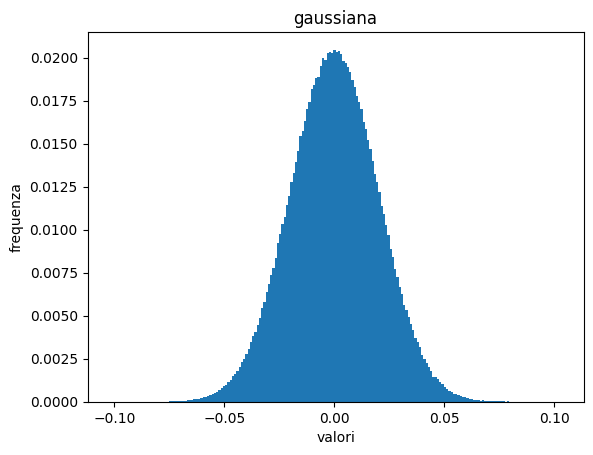

In [3]:
#visualizziamo Z per vedere se è effettivamente la gaussiana voluta
wts1 = np.ones_like(Z) / len(Z) #np.ones_like(Z) crea un array lungo quanto Z ma popolato solo da 1s, è una normalizzazione

plt.title("gaussiana")
plt.xlabel("valori")
plt.ylabel("frequenza")
plt.hist(Z,200,weights=wts1) #weights è il fattore moltiplicativo dato ad ogni valore
plt.show() #in una IDE non serve a niente, da terminale meglio metterlo perchè a volte non mostra i grafici nonostante li computi

In [4]:
x = np.zeros(N) #creo un array vuoto piena di zeri
x[0] = x0 #ci aggiungo l'elemento x0

for i in range(0,N-1):
    xplus1 = x[i] - (gamma * x[i] * dt) + Z[i] #eulero, qui calcolo l'elemento x[i+1] basandomi su x del passo precedente, h=gamma*x, g=1
    x[i+1] = xplus1 #qui popolo x con gli elementi x[i+1] trovati

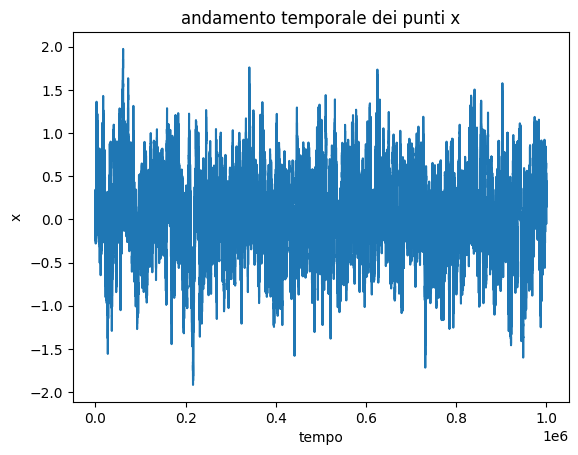

In [5]:
#visualizziamo l'andamento dei punti
plt.title("andamento temporale dei punti x")
plt.xlabel("tempo")
plt.ylabel("x")
plt.plot(x) 
plt.show()

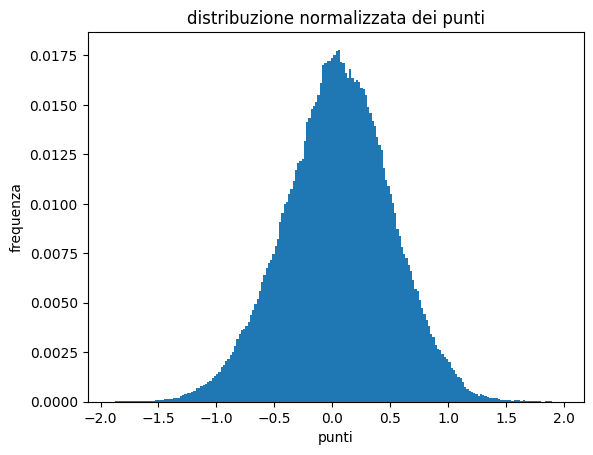

In [6]:
#visualizziamo la distribuzione dei punti, normalizzata
wts2 = np.ones_like(x) / len(x) #np.ones_like(x) crea un array lungo quanto x ma popolato solo da 1s

plt.title("distribuzione normalizzata dei punti")
plt.xlabel("punti")
plt.ylabel("frequenza")
plt.hist(x,200, weights=wts2)  #weights è il fattore moltiplicativo dato ad ogni valore
plt.show()

In [7]:
print("la media è:", np.mean(x))
print("la varianza è:", np.var(x))

la media è: 0.047717940587212945
la varianza è: 0.21165498292578228


In [8]:
print(len(x))

1000000


In [9]:
x

array([ 0.        , -0.01464674,  0.00039147, ...,  0.28400269,
        0.26181757,  0.26478347])

In [10]:
#Qua faccio lo shuffle
np.random.shuffle(x)

In [11]:
x

array([-0.84531301,  0.12641669, -0.47125901, ...,  0.21233758,
        0.22379562, -0.1718178 ])

In [12]:
acorr = []
lags = range(10000)
norm = float(np.correlate(x,x))
acorr = []
x1 = x
x2 = x

In [13]:
acorr.append(norm)

for lag in lags:
    #for i in range(n):
        #x1 = np.delete(x1, 0)
        #x2 = np.delete(x2, -1)
    x1 = np.delete(x1, 0)
    x2 = np.delete(x2, -1)    
    val = float(np.correlate(x1,x2))
    acorr.append(val)


In [14]:
acorrnorm = np.array(acorr)
acorrnorm = acorrnorm / norm
acorrnorm = np.delete(acorrnorm, -1)

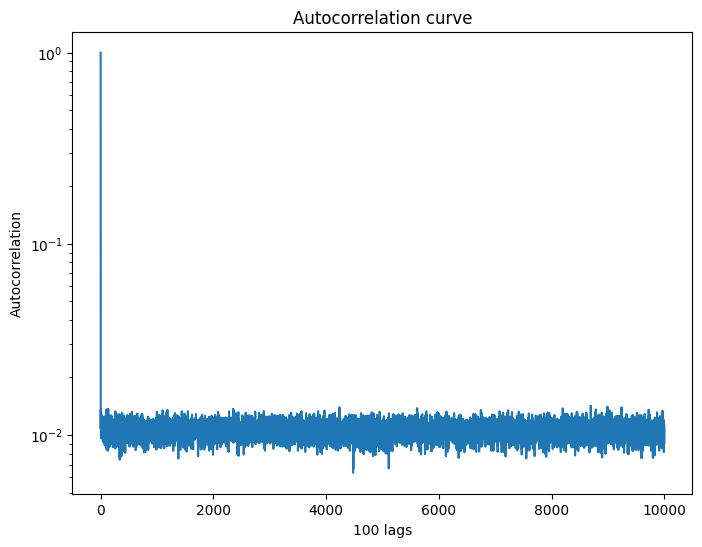

In [15]:
plt.figure(figsize=(8,6)) #must come BEFORE the actual plot
plt.plot(lags, acorrnorm) #Alpha is the opacity, density is the normalization
#plt.errorbar(x, y, yerr, ls='', color='k')
#plt.scatter(x, y, color='k', s=30, zorder=1000)
#plt.locator_params(y=20) this is about the density of thicks on both axis I could add <, axis='x'> inside the parentesis, to do just for one axis
plt.xlabel('100 lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation curve')
plt.yscale('log')
plt.xscale('linear')
#plt.xlim(0,3000) #questo limita l'asse x
#plt.ylim(0.1 ,1) #questo limite superiormente l'asse y
#plt.savefig('curva_gain1_log.jpg') #always save before plt.show() it should be "namefile.png" or "namefile.pdf"
plt.show()

In [92]:
len(x1)

990000